In [20]:
%matplotlib inline

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
matplotlib.rcParams["font.size"] = 24
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [22]:
df = pd.read_csv("results.csv")
df

,nodes,trial,v0_throughput,v0_mem_usage,v0_warm_time,v0_train_hit,v0_train_pkg_hit,v0_test_hit,v0_test_pkg_hit,v1_throughput,...,v2_train_pkg_hit,v2_test_hit,v2_test_pkg_hit,v3_throughput,v3_mem_usage,v3_warm_time,v3_train_hit,v3_train_pkg_hit,v3_test_hit,v3_test_pkg_hit
0,1.0,0,34.388,69296.0,148.914,0.01136,0.00000,0.01022,0.00000,34.685,...,0.00000,0.01022,0.00000,33.609,65280.0,155.926,0.01136,0.00000,0.01022,0.00000
1,20.0,0,36.151,160784.0,231.947,0.53068,0.22941,0.51759,0.22311,46.595,...,0.73140,0.58116,0.69040,84.424,457100.0,955.955,0.58750,0.36002,0.60726,0.36518
2,40.0,0,36.629,231884.0,357.590,0.64659,0.37049,0.64813,0.36338,49.103,...,0.82950,0.63678,0.78892,100.770,1107172.0,2132.930,0.61364,0.65103,0.62656,0.62080
3,80.0,0,43.967,417276.0,451.455,0.76477,0.52435,0.78547,0.51097,53.029,...,0.92143,0.83314,0.87841,133.855,2037124.0,3063.355,0.69432,0.79963,0.70488,0.74385
4,120.0,0,62.992,727240.0,786.649,0.87841,0.57735,0.88195,0.56748,54.721,...,0.95034,0.87741,0.90327,140.317,2720008.0,3707.860,0.75000,0.85173,0.74574,0.79092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,160.0,9,80.849,1002664.0,987.697,0.88750,0.58470,0.89103,0.60112,68.829,...,0.95420,0.89330,0.92967,169.115,3696520.0,5246.010,0.80455,0.84570,0.79682,0.83852
96,240.0,9,83.495,1397692.0,1280.218,0.92955,0.61145,0.91714,0.61471,70.924,...,0.97425,0.91373,0.93916,179.537,4337380.0,5541.283,0.83636,0.89118,0.82633,0.87362
97,320.0,9,82.889,1903680.0,1645.107,0.93409,0.62950,0.91827,0.62509,71.789,...,0.98434,0.94892,0.94579,178.068,4860304.0,5820.501,0.90455,0.93171,0.88763,0.90612
98,480.0,9,89.341,3047224.0,2605.477,0.96364,0.65324,0.95119,0.63970,72.379,...,0.99461,0.96708,0.94920,187.792,5465680.0,6260.050,0.98750,0.96435,0.96708,0.92653


In [23]:
df = df.reset_index().set_index(["trial", "nodes"])
df

index  v0_throughput  v0_mem_usage  v0_warm_time  v0_train_hit  \
trial nodes                                                                   
0     1.0        0         34.388       69296.0       148.914       0.01136   
      20.0       1         36.151      160784.0       231.947       0.53068   
      40.0       2         36.629      231884.0       357.590       0.64659   
      80.0       3         43.967      417276.0       451.455       0.76477   
      120.0      4         62.992      727240.0       786.649       0.87841   
...            ...            ...           ...           ...           ...   
9     160.0     95         80.849     1002664.0       987.697       0.88750   
      240.0     96         83.495     1397692.0      1280.218       0.92955   
      320.0     97         82.889     1903680.0      1645.107       0.93409   
      480.0     98         89.341     3047224.0      2605.477       0.96364   
      640.0     99         91.736     4297920.0      4291.719       0.97841   

             v0_train_pkg_hit  v0_test_hit  v0_test_pkg_hit  v1_throughput  \
trial nodes                                                                  
0     1.0             0.00000      0.01022          0.00000         34.685   
      20.0            0.22941      0.51759          0.22311         46.595   
      40.0            0.37049      0.64813          0.36338         49.103   
      80.0            0.52435      0.78547          0.51097         53.029   
      120.0           0.57735      0.88195          0.56748         54.721   
...                       ...          ...              ...            ...   
9     160.0           0.58470      0.89103          0.60112         68.829   
      240.0           0.61145      0.91714          0.61471         70.924   
      320.0           0.62950      0.91827          0.62509         71.789   
      480.0           0.65324      0.95119          0.63970         72.379   
      640.0           0.66658      0.96027          0.64714         76.633   

             v1_mem_usage  ...  v2_train_pkg_hit  v2_test_hit  \
trial nodes                ...                                  
0     1.0         67280.0  ...           0.00000      0.01022   
      20.0       240576.0  ...           0.73140      0.58116   
      40.0       367372.0  ...           0.82950      0.63678   
      80.0       657232.0  ...           0.92143      0.83314   
      120.0      928584.0  ...           0.95034      0.87741   
...                   ...  ...               ...          ...   
9     160.0     1396020.0  ...           0.95420      0.89330   
      240.0     2003012.0  ...           0.97425      0.91373   
      320.0     2519640.0  ...           0.98434      0.94892   
      480.0     3582316.0  ...           0.99461      0.96708   
      640.0     4399284.0  ...           1.00000      0.97616   

             v2_test_pkg_hit  v3_throughput  v3_mem_usage  v3_warm_time  \
trial nodes                                                               
0     1.0            0.00000         33.609       65280.0       155.926   
      20.0           0.69040         84.424      457100.0       955.955   
      40.0           0.78892        100.770     1107172.0      2132.930   
      80.0           0.87841        133.855     2037124.0      3063.355   
      120.0          0.90327        140.317     2720008.0      3707.860   
...                      ...            ...           ...           ...   
9     160.0          0.92967        169.115     3696520.0      5246.010   
      240.0          0.93916        179.537     4337380.0      5541.283   
      320.0          0.94579        178.068     4860304.0      5820.501   
      480.0          0.94920        187.792     5465680.0      6260.050   
      640.0          0.95050        184.036     5798364.0      6567.360   

             v3_train_hit  v3_train_pkg_hit  v3_test_hit  v3_test_pkg_hit  
trial nodes                                                             

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_throughput(df, versions, ylim=None, mode="throughput", labels=None, filename=None):
    matplotlib.rcParams['xtick.labelsize'] = 15
    matplotlib.rcParams['ytick.labelsize'] = 15
    matplotlib.rcParams['axes.labelsize'] = 15

    mean = df.groupby(level=1).mean()
    std = df.groupby(level=1).std()
    std = std.fillna(0.0)

    fig, ax = plt.subplots()

    palette = sns.color_palette('Set1')
    color_mapping = {
        "v0": {"style": "-", "color": palette[0]},
        "v1": {"style": "-", "color": "blue"},
        "v2": {"style": "-", "color": "brown"},
        "v3": {"style": "-", "color": "red"}
    }

    for col in df.columns:
        version_num = col.split('_')[0] 
        if '_throughput' in col and version_num in versions:
            style = color_mapping.get(version_num, {"style": "-", "color": "blue"})
            label = labels.get(version_num, version_num) if labels else version_num
            mean[col].plot.line(ax=ax, marker='o', markersize=4, label=label, **style)
            plt.fill_between(mean.index, mean[col]-std[col], mean[col]+std[col], color=style["color"], alpha=0.05)

    ax.set_xlabel("# Nodes for Import Cache Tree")
    unique_nodes = df.index.get_level_values('nodes').unique()
    ax.set_xticks(unique_nodes)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    if ylim is not None:
        ax.set_ylim(ylim)

    if mode == "hit_ratio":
        ax.set_ylabel("Hit Ratio", fontsize=20)
    elif mode == "throughput":
        ax.set_ylabel("Ops/Sec")

    ax.legend(frameon=True, ncol=1, fontsize=12)

    if filename is not None:
        fig.savefig(filename, dpi=300, bbox_inches='tight')

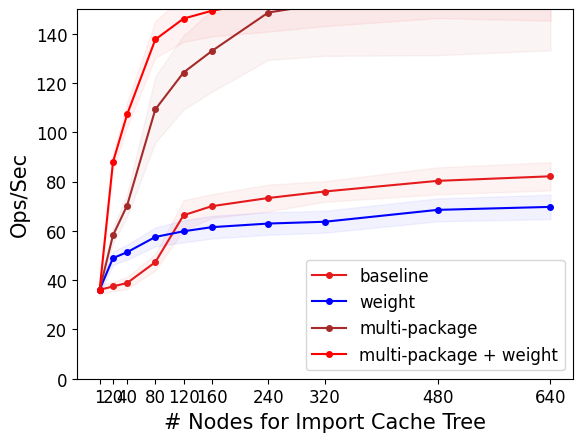

In [25]:
labels = {
    "v0": "baseline",
    "v1": "weight",
    "v2": "multi-package",
    "v3": "multi-package + weight"
    
}

plot_throughput(df, ["v0","v1","v2","v3"], (0,150), "throughput", labels, "throughput.pdf")

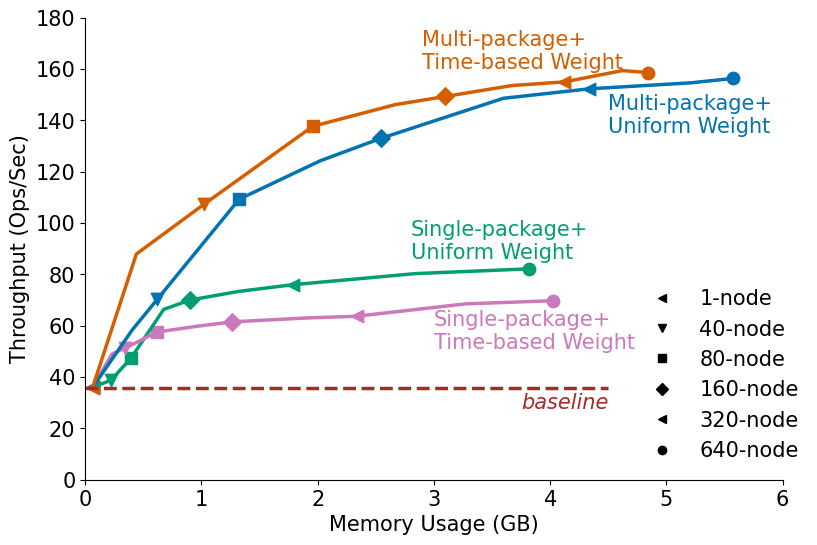

In [27]:
# fig 7
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

title_fontsize = 15
legend_fontsize = 15
ticks_fontsize = 15
label_fontsize = 15
text_size = 15
ticks_length = 5

def plot_mem_usage_vs_throughput(df, color_mapping, legend_labels, node_marker_mapping, filename=None):

    kb_to_gb = 1 / (1024 * 1024)
    fig, ax = plt.subplots(figsize=(9, 6))
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)
    ax.patch.set_facecolor('white')
    
    min_avg_throughput = 10000
    
    for version, style in color_mapping.items():
        all_nodes = df.index.get_level_values('nodes').unique()
        avg_mem_usage_gb = {}
        avg_throughput = {}

        for node in all_nodes:
            node_data = df.xs(node, level='nodes').groupby(level='trial').mean()
            mem_usage_gb = node_data[style['mem_usage_col']] * kb_to_gb
            throughput = node_data[style['throughput_col']]

            avg_mem_usage_gb[node] = mem_usage_gb.mean()
            avg_throughput[node] = throughput.mean()

            if node in node_marker_mapping:
                ax.scatter(mem_usage_gb.mean(), throughput.mean(), color=style['color'], marker=node_marker_mapping[node], s=80)
                
        min_avg_throughput = min(min(avg_throughput.values()), min_avg_throughput)
        
        nodes_sorted = sorted(all_nodes)
        avg_mem_usage_gb_sorted = [avg_mem_usage_gb[node] for node in nodes_sorted]
        avg_throughput_sorted = [avg_throughput[node] for node in nodes_sorted]

        text_x = None
        text_y = None
        if legend_labels[version] == "Multi-package+\nUniform Weight":
            text_x = 4.5
            text_y = 135
        if legend_labels[version] == "Multi-package+\nTime-based Weight":
            text_x = 2.9
            text_y = 160
        if legend_labels[version] == "Single-package+\nTime-based Weight":
            text_x = 3.0
            text_y = 51
        if legend_labels[version] == "Single-package+\nUniform Weight":
            text_x = 2.8
            text_y = 86

        ax.text(text_x, text_y, legend_labels[version], fontsize=text_size, color= style['color'])
        ax.plot(avg_mem_usage_gb_sorted, avg_throughput_sorted, color=style['color'], 
                linestyle=style['style'], label=legend_labels[version], linewidth=2.5)
    
    x_min = 0
    x_max = 4.5
    ax.plot([x_min, x_max], [min_avg_throughput, min_avg_throughput], color='brown', linestyle='--', linewidth=2.5)
    baseline_label_x = x_max  # or any x-value you prefer
    baseline_label_y = min_avg_throughput-10
    ax.text(baseline_label_x, baseline_label_y, "baseline", fontsize=15, va='bottom', ha='right', color='brown', fontstyle='italic')
    
    ax.set_xlabel("Memory Usage (GB)", fontsize=label_fontsize)
    ax.set_ylabel("Throughput (Ops/Sec)", fontsize=label_fontsize)
    ax.set_yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
    ax.tick_params(axis='y', labelsize=ticks_fontsize)
    ax.tick_params(axis='x', labelsize=ticks_fontsize)
    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    

    
    node_legend_handles = [plt.Line2D([0], [0], color='black', marker=marker, linestyle='', label=f'{node}-node')
                           for node, marker in node_marker_mapping.items()]
    node_legend = ax.legend(handles=node_legend_handles, 
                            loc='lower center', bbox_to_anchor=(0.91, 0), ncol=1, 
                            frameon=False, fontsize=legend_fontsize) #, title_fontsize=18, title='Node Count'

    if filename:
        fig.savefig(filename, dpi=300, bbox_inches='tight')

    plt.show()

palette = sns.color_palette('colorblind')

color_mapping = {
    "v0": {"style": "-", "color": palette[2], "mem_usage_col": "v0_mem_usage", "throughput_col": "v0_throughput"},
    "v1": {"style": "-", "color": palette[4], "mem_usage_col": "v1_mem_usage", "throughput_col": "v1_throughput"},
    "v2": {"style": "-", "color": palette[0], "mem_usage_col": "v2_mem_usage", "throughput_col": "v2_throughput"},
    "v3": {"style": "-", "color": palette[3], "mem_usage_col": "v3_mem_usage", "throughput_col": "v3_throughput"}
}

legend_labels = {
    "v0": "Single-package+\nUniform Weight",
    "v1": "Single-package+\nTime-based Weight",
    "v2": "Multi-package+\nUniform Weight",
    "v3": "Multi-package+\nTime-based Weight"
}

node_marker_mapping = {
    1: '<',
    40: 'v',
    80: 's',
    160: 'D',
    320: '<',
    640: 'o',
}

if not os.path.exists("./pics"):
    os.makedirs("./pics")
plot_mem_usage_vs_throughput(df, color_mapping, legend_labels, node_marker_mapping, filename="./pics/mem_usage_vs_throughput.pdf")

In [28]:
def throughput_stats(df_stat):
    throughput_avg = df_stat.groupby('nodes')[
        'v0_throughput', 'v1_throughput', 'v2_throughput', 'v3_throughput'].mean().reset_index()
    throughput_avg.columns = [
        col if col == 'nodes' else col + '_avg' for col in throughput_avg.columns]
    throughput_std = df_stat.groupby('nodes')[
        'v0_throughput', 'v1_throughput', 'v2_throughput', 'v3_throughput'].std().reset_index()
    throughput_std.columns = [
        col if col == 'nodes' else col + '_std' for col in throughput_std.columns]
    throughput_stat = pd.concat([throughput_avg, throughput_std], axis=1)
    return throughput_stat

def mem_stats(df_stat):
    mem_cols = ['v0_mem_usage', 'v1_mem_usage', 'v2_mem_usage', 'v3_mem_usage']
    for col in mem_cols:
        df_stat[col] = df_stat[col] / 1048576 
    mem_avg = df_stat.groupby('nodes')[
        'v0_mem_usage', 'v1_mem_usage', 'v2_mem_usage', 'v3_mem_usage'].mean().reset_index()
    mem_avg.columns = [
        col if col == 'nodes' else col + '_avg' for col in mem_avg.columns]
    mem_std = df_stat.groupby('nodes')[
        'v0_mem_usage', 'v1_mem_usage', 'v2_mem_usage', 'v3_mem_usage'].std().reset_index()
    mem_std.columns = [
        col if col == 'nodes' else col + '_std' for col in mem_std.columns]
    mem_stat = pd.concat([mem_avg, mem_std], axis=1)
    return mem_stat 

In [29]:
# print(throughput_stats(df))
# print(mem_stats(df))

In [30]:
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.labelsize'] = 17
matplotlib.rcParams['xtick.labelsize'] = 13
matplotlib.rcParams['ytick.labelsize'] = 13
legend_fontsize = 17
version_to_label = {
    "v0": "Single-package+Uniform Weight",
    "v1": "Single-package+Time-based Weight",
    "v2": "Multi-package+Uniform Weight",
    "v3": "Multi-package+Time-based Weight"
}

version_color_map = {
    'v0': sns.color_palette('colorblind')[2],
    'v1': sns.color_palette('colorblind')[4],
    'v2': sns.color_palette('colorblind')[0],
    'v3': sns.color_palette('colorblind')[3]
}

#markers = ['o', 's', '^', 'D']  # Circle, Square, Triangle Up, Diamond
markers = ['', '', '', ''] 
def plot_warmup(result_df, xticks, ax, legend_on=False, title_on=False):
    """
    Plot the average warmup time by nodes and version.
    """
    # Group by 'nodes' and calculate the mean of warm times
    warm_time_columns = ['v0_warm_time', 'v1_warm_time', 'v2_warm_time', 'v3_warm_time']
    grouped = result_df.groupby('nodes')[warm_time_columns].mean().reset_index()

    # Reshape the DataFrame from wide to long format
    melted = pd.melt(grouped, id_vars=['nodes'], value_vars=warm_time_columns,
                     var_name='version', value_name='avg_warm_time')

    # Plot each group with both line and different markers
    for (version, group), marker in zip(melted.groupby('version'), markers):
        version_str = version.split('_')[0]
        color = version_color_map.get(version_str, 'black')
        label = version_to_label.get(version_str, version_str)
        ax.plot(group['nodes'], group['avg_warm_time'],
                label=label, color=color, marker=marker, linewidth=2.5)

    # Adding labels and title
    ax.set_xlabel('Nodes')
    ax.set_ylabel('Average Warmup Time (ms)')
    if title_on:
        ax.set_title('Average Warm Time by Nodes and Version')
    ax.set_ylim([0, 7000])
    ax.set_xticks(xticks)
    ax.set_xlim(left=0)
    if legend_on:
        ax.legend()
    ax.grid(False)
    ax.text(0.7, 1, '(a) Warmup Time', transform=ax.transAxes, fontsize=17, verticalalignment='bottom', horizontalalignment='right')
    # ax.text(0.95, 0.05, '(a)', transform=ax.transAxes, fontsize=17, verticalalignment='bottom', horizontalalignment='right')

def plot_hit2(result_df, xticks, ax, legend_on=False, title_on=False):
    """
    Plot the average package hits by nodes and version.
    """
    # Group by 'nodes' and calculate the mean of package hits
    hit_columns = ['v0_test_pkg_hit', 'v1_test_pkg_hit', 'v2_test_pkg_hit', 'v3_test_pkg_hit']
    grouped = result_df.groupby('nodes')[hit_columns].mean().reset_index()

    # Reshape the DataFrame from wide to long format
    melted = pd.melt(grouped, id_vars=['nodes'], value_vars=hit_columns,
                     var_name='version', value_name='avg_pkg_hits')

    # Plot each group with both line and different markers
    for (version, group), marker in zip(melted.groupby('version'), markers):
        version_str = version.split('_')[0]
        color = version_color_map.get(version_str, 'black')
        label = version_to_label.get(version_str, version_str)
        ax.plot(group['nodes'], group['avg_pkg_hits'],
                label=label, color=color, marker=marker, linewidth=2.5)

    # Adding labels and title
    ax.set_xlabel('Nodes')
    ax.set_ylabel('Average Package Hits')
    if title_on:
        ax.set_title('Average Package Hits by Nodes and Version')
    ax.set_xticks(xticks)
    ax.set_ylim([0, 1])
    ax.set_xlim(left=0)
    if legend_on:
        ax.legend()
    ax.grid(False)
    
    ax.text(0.6, 1, '(b) Hit Rate', transform=ax.transAxes, fontsize=17, verticalalignment='bottom', horizontalalignment='right')
    # ax.text(0.95, 0.05, '(b)', transform=ax.transAxes, fontsize=17, verticalalignment='bottom', horizontalalignment='right')

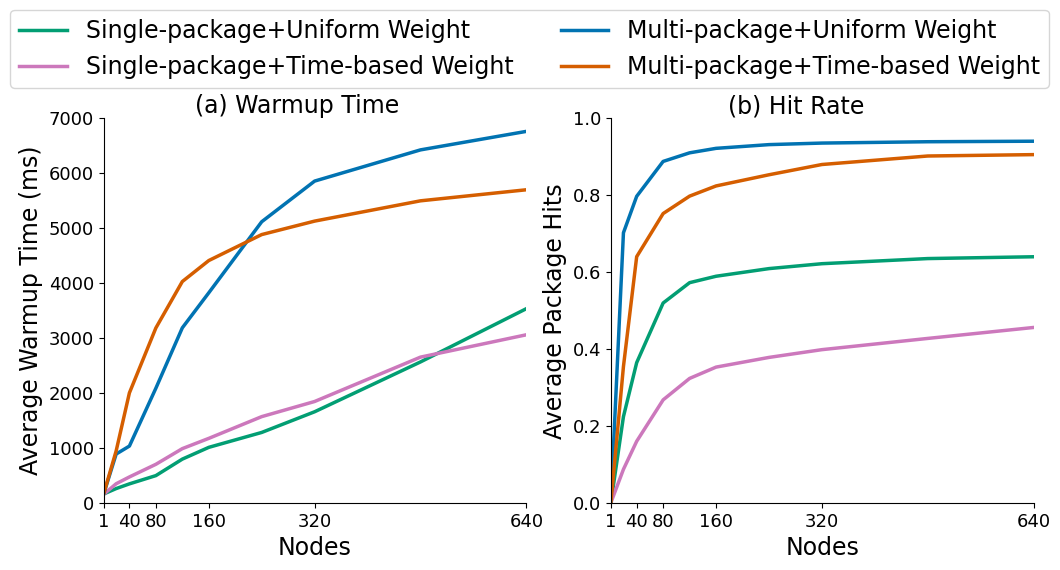

In [31]:
# fig 11
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

df = pd.read_csv("results.csv")
df = df.reset_index().set_index(["trial", "nodes"])

xticks = [1, 40, 80, 160, 320, 640]
plot_warmup(df, xticks=xticks, ax=ax1, legend_on=False, title_on=False)
plot_hit2(df, xticks=xticks, ax=ax2, legend_on=False, title_on=False)

handles, labels1 = ax1.get_legend_handles_labels()
labels = [version_to_label[version] for version in version_color_map.keys()]

plt.figlegend(handles, labels, loc='upper center', bbox_to_anchor=(0.48, 1.12), ncol=2, fontsize=legend_fontsize)
ax1.set_xticks(xticks)  
ax2.set_xticks(xticks)
ax1.set_xlim(min(xticks), max(xticks))
ax1.set_ylim(0)
ax2.set_xlim(min(xticks), max(xticks))
ax2.set_ylim(0)

plt.savefig('pics/cost_hit.pdf', format='pdf', bbox_inches='tight', dpi=600)

plt.show()

In [ ]:
"""
please don't run this cell!
"""

# a comparison of the memory usage with COW on and off
import matplotlib.ticker as ticker

version_to_label = {    
    "v0": "single-package+Uniform Weight",
    "v1": "single-package+Time-based Weight",
    "v2": "multi-package+Uniform Weight",
    "v3": "multi-package+Time-based Weight"
}
tree_colors = {
    "v0": "green",
    "v1": "blue",
    "v2": "brown",
    "v3": "red"
}
def visualize_subplots(df, columns_to_plot, filename=None):
    for col in columns_to_plot:
        if col in df.columns:
            df[col] /= 1024*1024
    # Set up a matplotlib figure with 4 subplots arranged in 2x2
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()  # Flatten the 2x2 array into a 1D array for easier access
    unique_nodes = df['nodes'].unique()
    
    # Adjustments for axis limits and font sizes
    x_limits = (-10, 250)  
    y_limits = (-0.5, 8.5) 
    ticks_fontsize = 18
    legend_fontsize = 18
    axis_label_fontsize = 18
    title_fontsize = 20
    
    markers = ['o', 's']

    for i, col in enumerate(columns_to_plot):
        ax = axs[i]
        if col in df.columns:
            for j, cow in enumerate([True, False]):
                grouped = df[df['cow'] == cow].groupby('nodes')
                mean_values = grouped[col].mean()
                std_values = grouped[col].std()
                if not cow:
                    c = adjust_lightness(tree_colors[col], 1.5)
                else:
                    c = tree_colors[col]
                ax.plot(mean_values.index.values, mean_values.values, label=f"{'COW' if cow else 'Non-COW'}",
        color=c, marker=markers[j])

                ax.fill_between(mean_values.index,
                                mean_values - std_values,
                                mean_values + std_values,
                                color=c, alpha=0.2)
                
                ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
                ax.set_xticks(unique_nodes)
                ax.set_yticks([0,1,2,3,4,5,6,7,8])
                ax.set_xlim(x_limits)
                ax.set_ylim(y_limits)
                ax.set_xlabel('Nodes', fontsize=axis_label_fontsize)
                ax.set_ylabel('Memory Usage (GB)', fontsize=axis_label_fontsize)
                ax.legend(fontsize=legend_fontsize)
    
    color_to_label_legend = [plt.Line2D([0], [0], color=tree_colors[version], lw=4, 
                                        label=version_to_label[version]) for version in tree_colors]
    plt.figlegend(handles=color_to_label_legend, loc='upper center', bbox_to_anchor=(0.5, 1.09), ncol=2, fontsize=20)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    if filename is not None:
        fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
df = pd.read_csv("mem.csv")
visualize_subplots(df, ['v0','v1','v2','v3'], filename="mem.pdf")